<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Aquiro, Freddielyn  E.<br>
    201811734 <br>
   58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

Bebang asked for help to know the sales from the last year's data such as the monthly revenue, costs, and profits. Also to know the sales in each flavor for per month the will be equivalent for a whole year and by identifying what are the top 3 best seller flavors and the worst 3 flavors. Also, she wanted to know how to improve her marketing strategy to avoid losses and to earn more profit. She has provided CSV data with the flavors of the donut, its prices, and months as references to get the needed data. To visualize the results, it can be presented with a bar graph or plot for Bebang to easily understand the result of her monthly revenues, profits, and costs.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [68]:
import pandas as pd

file_prices = ("/content/bebang prices.csv" )
file_sales = ("/content/bebang sales.csv")

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [69]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [70]:
import numpy as np
### Vectorizing the data
sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0]## reshape this vector to the appropriate size

#reshaping prices
prices_mat = prices_mat.reshape((12,1))

costs_mat = np.array(df_prices)[1] ## reshape this vector to the appropriate size

#reshaping costs 
costs_mat = costs_mat.reshape((12,1))


## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [71]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = np.multiply(sales,price) 
    monthly_costs = np.multiply(sales,cost) 
    monthly_profits = monthly_revenue - monthly_costs  
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [72]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)

### print the values
print(f'Monthly Revenue: \n'
     f'{month_rev}\n'
     f'Monthly Costs: \n'
     f'{month_cost}\n'
     f'Monthly Profit: \n'
     f'{month_profit}')

Monthly Revenue: 
[ 27335  18340  12740   5495  31290   1960   3115   1435    805   2730
   8085  31465   5250   8100   8600    800   3075     25     75      0
     25    150   7800  13700  11980  13480  17080    280   9340   1560
    720    960   1500   1960  15620  32040   4340   3920   3990    805
   6930    420   1120   1435    805   1260  10500  19810  32250  24900
  44250   4900   8850   4900   2150   4800   1300   3550  27450  44850
   8400  14880  14760   3120   6520   1040   1800    880   2160   1640
   8280  18240  39240  15200   6160    560   5880    600   3920   1320
    920   1440  22080  25320  21510  20790  15930   2205   4005      0
     45      0     45    360  15075   9630  17940   6090   1080   2880
  23670    120    150      0    240      0  23670  13740  12960   4920
   1920   1280   2600   2960   3120   1800   3560   4000  25280   9240
  20610  18540   3510   3510   3510    315    135    360     90     45
  14535  25380  35010  26370  29025   4500  44415   2835   

In [73]:
#Getting the total profit each month
January = np.sum(month_profit[0:144:12])
February = np.sum(month_profit[1:144:12])
March = np.sum(month_profit[2:144:12])
April = np.sum(month_profit[3:144:12])
May = np.sum(month_profit[4:144:12])
June = np.sum(month_profit[5:144:12])
July = np.sum(month_profit[6:144:12])
August = np.sum(month_profit[7:144:12])
September = np.sum(month_profit[7:144:12])
October = np.sum(month_profit[9:144:12])
November = np.sum(month_profit[10:144:12])
December = np.sum(month_profit[11:144:12])

In [74]:
# Printing the results for total profit each month
print(f'Total profit for the month of January = {January}\n'
      f'Total profit for the month of Feburary = {February}\n'
      f'Total profit for the month of April = {April}\n'
      f'Total profit for the month of May = {May}\n'
      f'Total profit for the month of June = {June}\n'
      f'Total profit for the month of July = {July}\n'
      f'Total profit for the month of August = {August}\n'
      f'Total profit for the month of September = {September}\n'
      f'Total profit for the month of October = {October}\n'
      f'Total profit for the month of November = {November}\n'
      f'Total profit for the month of December = {December}\n')

Total profit for the month of January = 79371
Total profit for the month of Feburary = 59208
Total profit for the month of April = 10001
Total profit for the month of May = 52824
Total profit for the month of June = 5527
Total profit for the month of July = 5598
Total profit for the month of August = 5498
Total profit for the month of September = 5498
Total profit for the month of October = 7213
Total profit for the month of November = 76548
Total profit for the month of December = 117156



## Part 2: Flavor Sales

In [75]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = np.multiply(sales,price)
    flavor_costs = np.multiply(sales,cost)
    flavor_profits = np.subtract(flavor_revenue, flavor_costs) 
    return flavor_profits.flatten()

In [76]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)

### print the values
print('fThe following data are the Flavor profit:\n'
      f'{flavor_profit}')

fThe following data are the Flavor profit:
[ 7810  5240  3640  1570  8940   560   890   410   230   780  2310  8990
  2100  3240  3440   320  1230    10    30     0    10    60  3120  5480
  5990  6740  8540   140  4670   780   360   480   750   980  7810 16020
  1860  1680  1710   345  2970   180   480   615   345   540  4500  8490
  9675  7470 13275  1470  2655  1470   645  1440   390  1065  8235 13455
  1890  3348  3321   702  1467   234   405   198   486   369  1863  4104
  9810  3800  1540   140  1470   150   980   330   230   360  5520  6330
  9560  9240  7080   980  1780     0    20     0    20   160  6700  4280
  8970  3045   540  1440 11835    60    75     0   120     0 11835  6870
  4860  1845   720   480   975  1110  1170   675  1335  1500  9480  3465
  5954  5356  1014  1014  1014    91    39   104    26    13  4199  7332
 10892  8204  9030  1400 13818   882   504  1246  1092  1386 10976 32340]


In [77]:
# Getting the total profit per flavor
red_vlvt = np.sum(flavor_profit[0:12])
oreo = np.sum(flavor_profit[12:24])
sugar_glzd = np.sum(flavor_profit[24:36])
almnd_honey = np.sum(flavor_profit[36:48])
matcha = np.sum(flavor_profit[48:60])
sb_cream = np.sum(flavor_profit[60:72])
brwnsugar_boba = np.sum(flavor_profit[72:84])
fruits_n_nuts = np.sum(flavor_profit[84:96])
dk_choco = np.sum(flavor_profit[96:108])
ch_n_orange = np.sum(flavor_profit[108:120])
ch_mint = np.sum(flavor_profit[120:132])
chbutter_nght = np.sum(flavor_profit[132:144])

In [79]:
# Printing the total profit per flavor.
print(f'Whole year profit of the flavor Red Velvet: {red_vlvt}\n'
      f'Whole year profit of the flavor Oreo: {oreo}\n'
      f'Whole year profit of the flavor Sugar Glazed: {sugar_glzd}\n'
      f'Whole year profit of the flavor Almond Honey: {almnd_honey}\n'
      f'Whole year profit of the flavor Matcha: {matcha}\n'
      f'Whole year profit of the flavor Strawberry Cream: {sb_cream}\n'
      f'Whole year profit of the flavor Brown Sugar Boba: {brwnsugar_boba}\n'
      f'Whole year profit of the flavor Fruits & Nuts: {fruits_n_nuts}\n'
      f'Whole year of the flavor Dark Chocolate: {dk_choco}\n'
      f'Whole year of the flavor Chocolate & Orange: {ch_n_orange}\n'
      f'Whole year of the flavor Choco Mint: {ch_mint}\n'
      f'Whole year of the flavor Choco Butter Naught: {chbutter_nght}\n')

Whole year profit of the flavor Red Velvet: 41370
Whole year profit of the flavor Oreo: 19040
Whole year profit of the flavor Sugar Glazed: 53260
Whole year profit of the flavor Almond Honey: 23715
Whole year profit of the flavor Matcha: 61245
Whole year profit of the flavor Strawberry Cream: 18387
Whole year profit of the flavor Brown Sugar Boba: 30660
Whole year profit of the flavor Fruits & Nuts: 39820
Whole year of the flavor Dark Chocolate: 44790
Whole year of the flavor Chocolate & Orange: 27615
Whole year of the flavor Choco Mint: 26156
Whole year of the flavor Choco Butter Naught: 91770



In [80]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.

# Best Sellers
best_3_flavors = [(chbutter_nght),(matcha),(sugar_glzd)]
best =np.sort(best_3_flavors)

#Printing the result from the np.sort().
print("The best 3 flavors are the following:")
print("Choco Butter Naught with its selling profitt: {0}\nMatcha with its selling profit: {1}\nSugar Glazed with its selling profit: {2} ".format(chbutter_nght,matcha,sugar_glzd))

# Worst Flavors.
worst_3_flavors = [(sb_cream),(oreo),(almnd_honey)]
worst = np.sort(worst_3_flavors)

#Printing the result from the np.sort().
print("\nThe worst 3 flavors are the following:")
print("Strawberry Cream with its selling profit: {0}\nOreo with its selling profit: {1}\nAlmond Honey with its selling profit: {2} ".format(sb_cream,oreo,almnd_honey))


The best 3 flavors are the following:
Choco Butter Naught with its selling profitt: 91770
Matcha with its selling profit: 61245
Sugar Glazed with its selling profit: 53260 

The worst 3 flavors are the following:
Strawberry Cream with its selling profit: 18387
Oreo with its selling profit: 19040
Almond Honey with its selling profit: 23715 


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [89]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

#### Entire Dataset

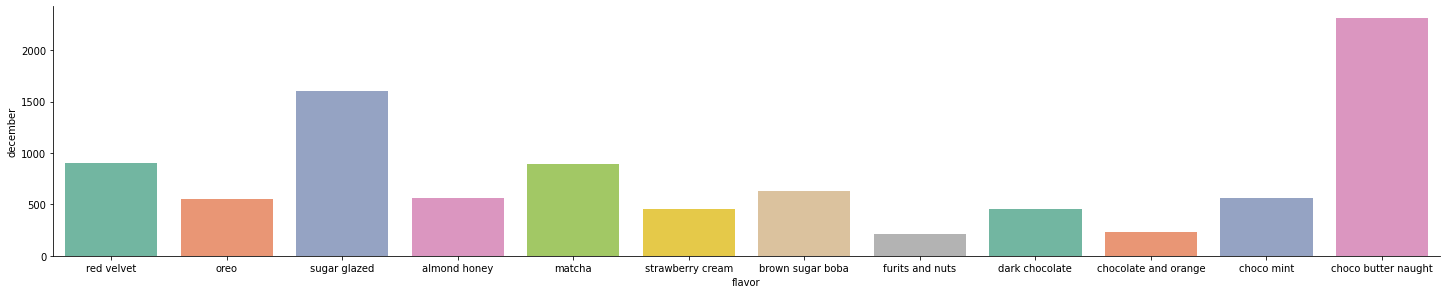

In [90]:
sns.catplot(x='flavor',y ="december",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

#### Monthly Sales

In [83]:
# Creating another CSV file for the monthly sales.
bebang_profit_sales = ('/content/bebang_total_profit_Sales.csv')
df_profit_sales_per_month = pd.read_csv(bebang_profit_sales)

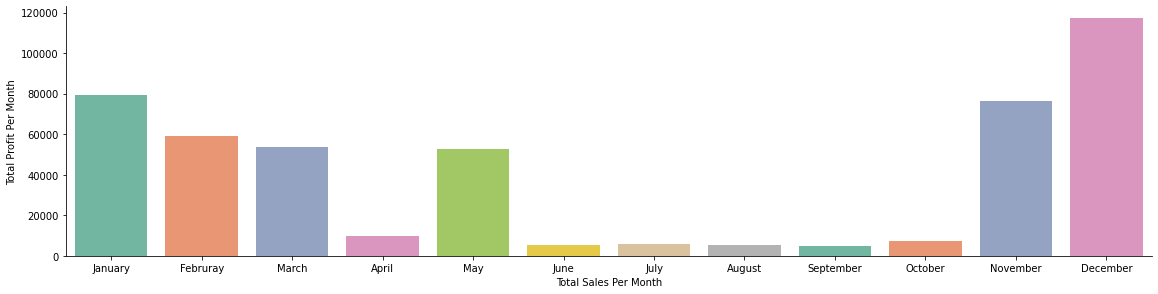

In [91]:
sns.catplot(x = 'Total Sales Per Month', y = 'Total Profit Per Month',
                data = df_profit_sales_per_month, palette = 'Set2', kind ="bar",
                height = 4, aspect = 4)

#### Flavor Sales

In [92]:
# Creating another CSV file for the flavor sales.
bebang_flavors_sales = ('/content/bebang_flavors_profit.csv')
df_profit_per_flavor = pd.read_csv(bebang_flavors_sales)

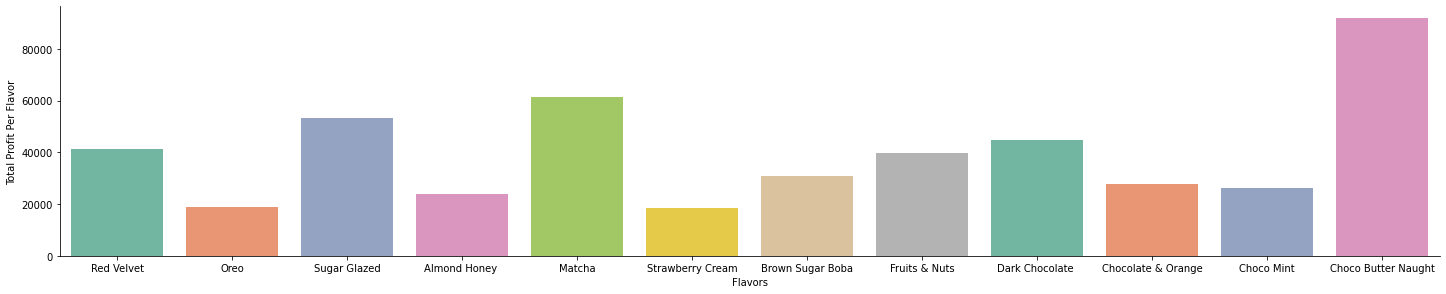

In [93]:
sns.catplot(x = 'Flavors', y = 'Total Profit Per Flavor',
                data = df_profit_per_flavor, palette = 'Set2', kind ="bar",
                height = 4, aspect=5)

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

Based on the result of the data gathered, it has shown the analysis of the data presented with bar graph or  plot, It can be observed what month and flavors are best sellers which has the highest profit from November to March. I would highly recommend increasing the production of the flavors during these months to have more profit. However, for business, it has a month that has a low-sales which customers barely buy donuts. I would recommend setting a standard production of donuts from April, June to October only or remove the old flavors that have a low-sales and change it to a new flavor of donut which customers rarely heard and it can be a unique flavor that the customers will like and for optional recommendation try to add drinks like coffee or iced tea. When it comes to the strategy of selling donuts have a promotion every 3 months or put the donuts on sale when the expiration date is near to avoid the losses of profit.
